In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
pd.options.mode.chained_assignment = None 

In [9]:
raw_data = pd.read_csv('IndexE8.csv')
df_comp = raw_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [10]:
df_comp['market_value'] = df_comp.ftse
del df_comp['spx'],df_comp['dax'],df_comp['ftse'],df_comp['nikkei']
size = int(len(df_comp)*0.8)
train_df = df_comp.iloc[:size]
test_df = df_comp.iloc[size:]

In [55]:
# funtion to test LLR
def LLR_test(mod_1,mod_2,DF=1):
    
    L1 = mod_1.fit(start_ar_lags=11).llf
    L2 = mod_2.fit(start_ar_lags=11).llf
    LR = (2*(L2-L1))
    P = chi2.sf(LR,DF).round(3)
    
    return P

### Creating Returns

In [12]:
train_df['return_val'] = train_df.market_value.pct_change(1).mul(100)

### ARIMA(1,1,1)

In [15]:
model_ar_1_i_1_ma_1 = ARIMA(train_df.market_value, order=(1,1,1))
result_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
result_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Thu, 15 Oct 2020   AIC                          55215.333
Time:                        20:19:34   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5655      0.682      0.829      0.407      -0.772       1.903
ar.L1.D.market_value     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.D.market_value    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

### Residuals of ARIMA(1,1,1) model

In [23]:
train_df['res_ar_1_i_1_ma_1'] = result_ar_1_i_1_ma_1.resid

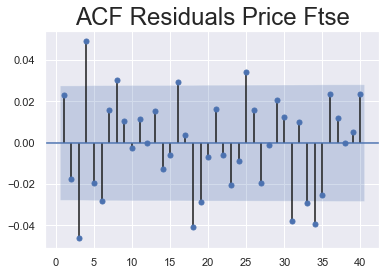

In [24]:
sgt.plot_acf(train_df.res_ar_1_i_1_ma_1[1:], zero=False, lags=40)
plt.title('ACF Residuals Price Ftse', size=24)
plt.show()

In [25]:
train_df.head()

,market_value,return_val,res_ar_1_i_1_ma_1
date,,,
1994-01-07,3445.98,NaN,NaN
1994-01-10,3440.58,-0.156704,-5.965547
1994-01-11,3413.77,-0.779229,-27.627900
1994-01-12,3372.02,-1.222988,-43.711999
1994-01-13,3360.01,-0.356166,-15.569135


### Higher Lag ARIMA Models

In [26]:
model_ar_1_i_1_ma_2 = ARIMA(train_df.market_value, order=(1,1,2))
result_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
result_ar_1_i_1_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -27600.082
Method:                       css-mle   S.D. of innovations             59.091
Date:                Thu, 15 Oct 2020   AIC                          55210.164
Time:                        20:28:01   BIC                          55242.770
Sample:                    01-10-1994   HQIC                         55221.589
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5659      0.692      0.818      0.413      -0.790       1.922
ar.L1.D.market_value     0.5886      0.100      5.890      0.000       0.393       0.784
ma.L1.D.market_value    -0.6131      0.100     -6.139      0.000      -0.809      -0.417
ma.L2.D.market_value    -0.0457      0.016     -2.864      0.004      -0.077      -0.014
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6989           +0.0000j            1.6989            0.0000
MA.1            1.4699           +0.0000j            1.4699            0.0000
MA.2          -14.8760           +0.0000j           14.8760            0.5000
-----------------------------------------------------------------------------
"""

In [27]:
model_ar_1_i_1_ma_3 = ARIMA(train_df.market_value, order=(1,1,3))
result_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
result_ar_1_i_1_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 3)   Log Likelihood              -27590.424
Method:                       css-mle   S.D. of innovations             58.978
Date:                Thu, 15 Oct 2020   AIC                          55192.848
Time:                        20:28:07   BIC                          55231.975
Sample:                    01-10-1994   HQIC                         55206.559
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5652      0.723      0.782      0.434      -0.851       1.982
ar.L1.D.market_value    -0.3585      0.125     -2.878      0.004      -0.603      -0.114
ma.L1.D.market_value     0.3386      0.124      2.730      0.006       0.096       0.582
ma.L2.D.market_value    -0.0590      0.015     -3.932      0.000      -0.088      -0.030
ma.L3.D.market_value    -0.1002      0.015     -6.866      0.000      -0.129      -0.072
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.7896           +0.0000j            2.7896            0.5000
MA.1           -1.5201           -1.3272j            2.0180           -0.3858
MA.2           -1.5201           +1.3272j            2.0180            0.3858
MA.3            2.4511           -0.0000j            2.4511           -0.0000
-----------------------------------------------------------------------------
"""

In [28]:
model_ar_2_i_1_ma_1 = ARIMA(train_df.market_value, order=(2,1,1))
result_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
result_ar_2_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -27599.807
Method:                       css-mle   S.D. of innovations             59.088
Date:                Thu, 15 Oct 2020   AIC                          55209.615
Time:                        20:28:13   BIC                          55242.221
Sample:                    01-10-1994   HQIC                         55221.041
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5658      0.694      0.815      0.415      -0.794       1.926
ar.L1.D.market_value     0.6298      0.094      6.709      0.000       0.446       0.814
ar.L2.D.market_value    -0.0471      0.016     -2.919      0.004      -0.079      -0.015
ma.L1.D.market_value    -0.6529      0.093     -7.000      0.000      -0.836      -0.470
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8413           +0.0000j            1.8413            0.0000
AR.2           11.5269           +0.0000j           11.5269            0.0000
MA.1            1.5317           +0.0000j            1.5317            0.0000
-----------------------------------------------------------------------------
"""

In [29]:
model_ar_3_i_1_ma_1 = ARIMA(train_df.market_value, order=(3,1,1))
result_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
result_ar_3_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(3, 1, 1)   Log Likelihood              -27592.055
Method:                       css-mle   S.D. of innovations             58.997
Date:                Thu, 15 Oct 2020   AIC                          55196.111
Time:                        20:28:18   BIC                          55235.238
Sample:                    01-10-1994   HQIC                         55209.821
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5639      0.740      0.762      0.446      -0.887       2.015
ar.L1.D.market_value    -0.4066      0.121     -3.357      0.001      -0.644      -0.169
ar.L2.D.market_value    -0.0585      0.015     -3.820      0.000      -0.089      -0.028
ar.L3.D.market_value    -0.0941      0.014     -6.635      0.000      -0.122      -0.066
ma.L1.D.market_value     0.3864      0.121      3.186      0.001       0.149       0.624
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7151           -0.0000j            1.7151           -0.5000
AR.2            0.5467           -2.4281j            2.4889           -0.2148
AR.3            0.5467           +2.4281j            2.4889            0.2148
MA.1           -2.5880           +0.0000j            2.5880            0.5000
-----------------------------------------------------------------------------
"""

In [31]:
model_ar_3_i_1_ma_2 = ARIMA(train_df.market_value, order=(3,1,2))
result_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit(start_ar_lags=4)
result_ar_3_i_1_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -27590.661
Method:                       css-mle   S.D. of innovations             58.980
Date:                Thu, 15 Oct 2020   AIC                          55195.322
Time:                        20:29:02   BIC                          55240.970
Sample:                    01-10-1994   HQIC                         55211.317
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5625      0.765      0.735      0.462      -0.938       2.063
ar.L1.D.market_value    -0.5774      0.122     -4.746      0.000      -0.816      -0.339
ar.L2.D.market_value    -0.4395      0.159     -2.764      0.006      -0.751      -0.128
ar.L3.D.market_value    -0.0967      0.015     -6.608      0.000      -0.125      -0.068
ma.L1.D.market_value     0.5593      0.122      4.580      0.000       0.320       0.799
ma.L2.D.market_value     0.3842      0.162      2.371      0.018       0.067       0.702
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4295           -1.6190j            1.6750           -0.2913
AR.2           -0.4295           +1.6190j            1.6750            0.2913
AR.3           -3.6862           -0.0000j            3.6862           -0.5000
MA.1           -0.7280           -1.4398j            1.6134           -0.3245
MA.2           -0.7280           +1.4398j            1.6134            0.3245
-----------------------------------------------------------------------------
"""

In [34]:
print(f"\nARIMA Model(1,1,1) LL {result_ar_1_i_1_ma_1.llf} and  AIC {result_ar_1_i_1_ma_1.aic}")
print(f"\nARIMA Model(1,1,2) LL {result_ar_1_i_1_ma_2.llf} and  AIC {result_ar_1_i_1_ma_2.aic}")
print(f"\nARIMA Model(1,1,3) LL {result_ar_1_i_1_ma_3.llf} and  AIC {result_ar_1_i_1_ma_3.aic}")
print(f"\nARIMA Model(2,1,1) LL {result_ar_2_i_1_ma_1.llf} and  AIC {result_ar_2_i_1_ma_1.aic}")
print(f"\nARIMA Model(3,1,1) LL {result_ar_3_i_1_ma_1.llf} and  AIC {result_ar_3_i_1_ma_1.aic}")
print(f"\nARIMA Model(3,1,2) LL {result_ar_3_i_1_ma_2.llf} and  AIC {result_ar_3_i_1_ma_2.aic}")


ARIMA Model(1,1,1) LL -27603.666412765524 and  AIC 55215.33282553105

ARIMA Model(1,1,2) LL -27600.081863140535 and  AIC 55210.16372628107

ARIMA Model(1,1,3) LL -27590.424032567866 and  AIC 55192.84806513573

ARIMA Model(2,1,1) LL -27599.807487846578 and  AIC 55209.614975693155

ARIMA Model(3,1,1) LL -27592.055371704962 and  AIC 55196.110743409925

ARIMA Model(3,1,2) LL -27590.660808973276 and  AIC 55195.32161794655


In [35]:
print(f"LLR Test P-value {LLR_test(model_ar_1_i_1_ma_2,model_ar_1_i_1_ma_3)}")

LLR Test P-value 0.0


In [36]:
print(f"LLR Test P-value {LLR_test(model_ar_1_i_1_ma_1,model_ar_1_i_1_ma_3,DF=2)}")

LLR Test P-value 0.0


In [40]:
train_df['res_ar_1_i_1_ma_3'] = result_ar_1_i_1_ma_3.resid.iloc[:]

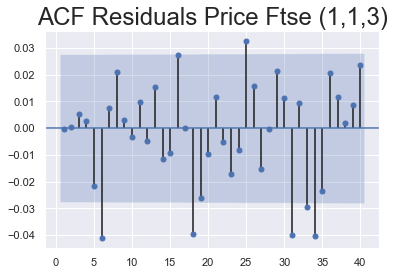

In [42]:
sgt.plot_acf(train_df.res_ar_1_i_1_ma_3[1:], zero=False, lags=40)
plt.title('ACF Residuals Price Ftse (1,1,3)', size=24)
plt.show()

In [43]:
model_ar_6_i_1_ma_3 = ARIMA(train_df.market_value, order=(6,1,3))
result_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit(start_ar_lags=4)
result_ar_6_i_1_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(6, 1, 3)   Log Likelihood              -27581.455
Method:                       css-mle   S.D. of innovations             58.872
Date:                Thu, 15 Oct 2020   AIC                          55184.911
Time:                        20:42:13   BIC                          55256.644
Sample:                    01-10-1994   HQIC                         55210.047
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5683      0.649      0.876      0.381      -0.704       1.840
ar.L1.D.market_value     1.1252      0.075     15.075      0.000       0.979       1.271
ar.L2.D.market_value    -1.0691      0.077    -13.912      0.000      -1.220      -0.918
ar.L3.D.market_value     0.7754      0.078      9.988      0.000       0.623       0.928
ar.L4.D.market_value     0.0725      0.028      2.611      0.009       0.018       0.127
ar.L5.D.market_value    -0.0864      0.024     -3.630      0.000      -0.133      -0.040
ar.L6.D.market_value     0.0795      0.017      4.679      0.000       0.046       0.113
ma.L1.D.market_value    -1.1467      0.073    -15.639      0.000      -1.290      -1.003
ma.L2.D.market_value     1.0459      0.075     13.883      0.000       0.898       1.194
ma.L3.D.market_value    -0.8189      0.073    -11.196      0.000      -0.962      -0.676
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0581           -0.0000j            1.0581           -0.0000
AR.2            0.0900           -1.0615j            1.0654           -0.2365
AR.3            0.0900           +1.0615j            1.0654            0.2365
AR.4           -2.2750           -0.0000j            2.2750           -0.5000
AR.5            1.0620           -1.8651j            2.1463           -0.1676
AR.6            1.0620           +1.8651j            2.1463            0.1676
MA.1            1.0507           -0.0000j            1.0507           -0.0000
MA.2            0.1133           -1.0721j            1.0781           -0.2332
MA.3            0.1133           +1.0721j            1.0781            0.2332
-----------------------------------------------------------------------------
"""

In [44]:
model_ar_5_i_1_ma_1 = ARIMA(train_df.market_value, order=(5,1,1))
result_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit(start_ar_lags=4)
result_ar_5_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -27586.512
Method:                       css-mle   S.D. of innovations             58.932
Date:                Thu, 15 Oct 2020   AIC                          55189.024
Time:                        20:42:36   BIC                          55241.193
Sample:                    01-10-1994   HQIC                         55207.305
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5662      0.690      0.820      0.412      -0.787       1.919
ar.L1.D.market_value     0.4011      0.159      2.529      0.011       0.090       0.712
ar.L2.D.market_value    -0.0445      0.016     -2.856      0.004      -0.075      -0.014
ar.L3.D.market_value    -0.0543      0.017     -3.164      0.002      -0.088      -0.021
ar.L4.D.market_value     0.0586      0.019      3.069      0.002       0.021       0.096
ar.L5.D.market_value    -0.0581      0.014     -4.118      0.000      -0.086      -0.030
ma.L1.D.market_value    -0.4213      0.158     -2.659      0.008      -0.732      -0.111
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7609           -0.0000j            1.7609           -0.5000
AR.2            1.4633           -0.8605j            1.6975           -0.0846
AR.3            1.4633           +0.8605j            1.6975            0.0846
AR.4           -0.0790           -1.8393j            1.8410           -0.2568
AR.5           -0.0790           +1.8393j            1.8410            0.2568
MA.1            2.3734           +0.0000j            2.3734            0.0000
-----------------------------------------------------------------------------
"""

In [46]:
print(f"\nARIMA Model(6,1,3) LL {result_ar_6_i_1_ma_3.llf} and  AIC {result_ar_6_i_1_ma_3.aic}")
print(f"\nARIMA Model(5,1,1) LL {result_ar_5_i_1_ma_1.llf} and  AIC {result_ar_5_i_1_ma_1.aic}")
print(f"\nARIMA Model(1,1,3) LL {result_ar_1_i_1_ma_3.llf} and  AIC {result_ar_1_i_1_ma_3.aic}")


ARIMA Model(6,1,3) LL -27581.45547818811 and  AIC 55184.91095637622

ARIMA Model(5,1,1) LL -27586.51188811098 and  AIC 55189.02377622196

ARIMA Model(1,1,3) LL -27590.424032567866 and  AIC 55192.84806513573


In [56]:
#print(f"LLR Test P-value {LLR_test(model_ar_1_i_1_ma_3,model_ar_5_i_1_ma_1,DF=2)}")
print(f"LLR Test P-value {LLR_test(model_ar_1_i_1_ma_3,model_ar_6_i_1_ma_3,DF=5)}")
print(f"LLR Test P-value {LLR_test(model_ar_5_i_1_ma_1,model_ar_6_i_1_ma_3,DF=3)}")

LLR Test P-value 0.018
LLR Test P-value 0.117


In [57]:
train_df['res_ar_5_i_1_ma_1'] = result_ar_5_i_1_ma_1.resid.iloc[:]

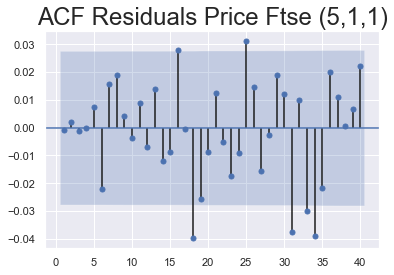

In [58]:
sgt.plot_acf(train_df.res_ar_5_i_1_ma_1[1:], zero=False, lags=40)
plt.title('ACF Residuals Price Ftse (5,1,1)', size=24)
plt.show()

In [59]:
train_df['delta_price'] = train_df.market_value.diff(1)

In [62]:
model_delta_ar_1_i_0_ma_1 = ARIMA(train_df.delta_price[1:], order=(1,0,1))
result_delta_ar_1_i_0_ma_1 = model_delta_ar_1_i_0_ma_1.fit()
result_delta_ar_1_i_0_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            delta_price   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Thu, 15 Oct 2020   AIC                          55215.333
Time:                        21:03:14   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5655      0.682      0.829      0.407      -0.772       1.903
ar.L1.delta_price     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.delta_price    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

In [63]:
sts.adfuller(train_df.delta_price[1:])

(-32.24409349570747,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54845.96104221891)

 ### From DF test we have significace level - 0.0 and test statistics 10 time greater at significance level 1% hence we can say that delta data is stationary

## ARIMAX Model

In [68]:
raw_data = pd.read_csv('IndexE8.csv')
df_comp = raw_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [69]:
df_comp['market_value'] = df_comp.ftse
#del df_comp['dax'],df_comp['ftse'],df_comp['nikkei']
size = int(len(df_comp)*0.8)
train_df = df_comp.iloc[:size]
test_df = df_comp.iloc[size:]

In [70]:
model_ar_1_i_1_ma_1_Xspx = ARIMA(train_df.market_value, exog=train_df.spx, order=(1,1,1))
result_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
result_ar_1_i_1_ma_1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.556
Method:                       css-mle   S.D. of innovations             59.132
Date:                Thu, 15 Oct 2020   AIC                          55217.112
Time:                        21:37:56   BIC                          55249.718
Sample:                    01-10-1994   HQIC                         55228.538
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5875      2.655     -0.221      0.825      -5.792       4.617
spx                      0.0011      0.002      0.451      0.652      -0.004       0.006
ar.L1.D.market_value     0.7456      0.070     10.578      0.000       0.607       0.884
ma.L1.D.market_value    -0.7917      0.065    -12.273      0.000      -0.918      -0.665
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3412           +0.0000j            1.3412            0.0000
MA.1            1.2632           +0.0000j            1.2632            0.0000
-----------------------------------------------------------------------------
"""

In [71]:
model_ar_1_i_1_ma_1_Xdax = ARIMA(train_df.market_value, exog=train_df.dax, order=(1,1,1))
result_ar_1_i_1_ma_1_Xdax = model_ar_1_i_1_ma_1_Xdax.fit()
result_ar_1_i_1_ma_1_Xdax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.662
Method:                       css-mle   S.D. of innovations             59.133
Date:                Thu, 15 Oct 2020   AIC                          55217.323
Time:                        21:38:30   BIC                          55249.929
Sample:                    01-10-1994   HQIC                         55228.749
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7999      2.107      0.380      0.704      -3.330       4.930
dax                  -4.621e-05      0.000     -0.116      0.908      -0.001       0.001
ar.L1.D.market_value     0.7474      0.070     10.630      0.000       0.610       0.885
ma.L1.D.market_value    -0.7936      0.064    -12.346      0.000      -0.920      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3380           +0.0000j            1.3380            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

In [72]:
model_ar_1_i_1_ma_1_Xnikkei = ARIMA(train_df.market_value, exog=train_df.nikkei, order=(1,1,1))
result_ar_1_i_1_ma_1_Xnikkei = model_ar_1_i_1_ma_1_Xnikkei.fit()
result_ar_1_i_1_ma_1_Xnikkei.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.620
Method:                       css-mle   S.D. of innovations             59.133
Date:                Thu, 15 Oct 2020   AIC                          55217.241
Time:                        21:39:08   BIC                          55249.847
Sample:                    01-10-1994   HQIC                         55228.667
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0285      2.446     -0.012      0.991      -4.822       4.765
nikkei                4.353e-05      0.000      0.257      0.797      -0.000       0.000
ar.L1.D.market_value     0.7474      0.070     10.636      0.000       0.610       0.885
ma.L1.D.market_value    -0.7936      0.064    -12.358      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3380           +0.0000j            1.3380            0.0000
MA.1            1.2602           +0.0000j            1.2602            0.0000
-----------------------------------------------------------------------------
"""

In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [76]:
model_sarimax = SARIMAX(train_df.market_value, exog=train_df.spx, order=(1,0,1), seasonal_order=(2,0,1,5))
result_sarimax = model_sarimax.fit()
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 5021
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -26712.665
Date:                           Thu, 15 Oct 2020   AIC                          53439.331
Time:                                   21:56:05   BIC                          53484.981
Sample:                               01-07-1994   HQIC                         53455.327
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6884      0.035     75.790      0.000       2.619       2.758
ar.L1          0.9998      0.000   2359.992      0.000       0.999       1.001
ma.L1         -0.3073      0.009    -32.861      0.000      -0.326      -0.289
ar.S.L5        0.9655      0.008    115.385      0.000       0.949       0.982
ar.S.L10       0.0342      0.008      4.553      0.000       0.019       0.049
ma.S.L5       -0.9988      0.006   -167.130      0.000      -1.011      -0.987
sigma2      2438.2992     28.324     86.087      0.000    2382.786    2493.813
===================================================================================
Ljung-Box (Q):                       95.72   Jarque-Bera (JB):              4214.16
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""